In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


In [3]:
df = pd.read_csv("files/df_limpio.csv")

In [4]:
df.head()

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,coordinates,latitude,longitude
0,Afghanistan,60,AF,58.1,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.3,AFN,4.47,2.1,0.70,"19,101,353,833",104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,"38,041,754",48.9,9.3,71.4,11.12,"9,797,273","('33.93911 ', '67.709953')",('33.93911 ','67.709953')
1,Albania,105,AL,43.1,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.4,ALL,1.62,28.1,1.36,"15,278,077,447",107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,"2,854,191",55.7,18.6,36.6,12.33,"1,747,593","('41.153332 ', '20.168331')",('41.153332 ','20.168331')
2,Algeria,18,DZ,17.4,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.0,DZD,3.02,0.8,0.28,"169,988,236,398",109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,"43,053,054",41.2,37.2,66.1,11.70,"31,510,100","('28.033886 ', '1.659626')",('28.033886 ','1.659626')
3,Andorra,164,AD,40.0,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.0,1.51,"3,154,057,987",106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873","('42.506285 ', '1.521801')",('42.506285 ','1.521801')
4,Angola,26,AO,47.5,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.1,AOA,5.52,46.3,0.97,"94,635,415,870",113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,"31,825,295",77.5,9.2,49.1,6.89,"21,061,025","('-11.202692 ', '17.873887')",('-11.202692 ','17.873887')



Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.

In [5]:
columnas_con_nulos = df.columns[df.isnull().any()]
print(columnas_con_nulos)

    


Index(['abbreviation', 'agriculturalland', 'landarea', 'armedforcessize',
       'birthrate', 'callingcode', 'capital/majorcity', 'co2-emissions', 'cpi',
       'cpichange', 'currency-code', 'fertilityrate', 'forestedarea',
       'gasolineprice', 'gdp', 'grossprimaryeducationenrollment',
       'grosstertiaryeducationenrollment', 'infantmortality', 'largestcity',
       'lifeexpectancy', 'maternalmortalityratio', 'minimumwage',
       'officiallanguage', 'outofpockethealthexpenditure',
       'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population'],
      dtype='object')


In [6]:
len(columnas_con_nulos)

31


Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.

In [7]:
df[columnas_con_nulos].dtypes


abbreviation                          object
agriculturalland                     float64
landarea                              object
armedforcessize                       object
birthrate                            float64
callingcode                          float64
capital/majorcity                     object
co2-emissions                         object
cpi                                   object
cpichange                            float64
currency-code                         object
fertilityrate                        float64
forestedarea                         float64
gasolineprice                        float64
gdp                                   object
grossprimaryeducationenrollment      float64
grosstertiaryeducationenrollment     float64
infantmortality                      float64
largestcity                           object
lifeexpectancy                       float64
maternalmortalityratio               float64
minimumwage                          float64
officialla

In [8]:
df[columnas_con_nulos].head(2)

,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population
0,AF,58.1,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.3,AFN,4.47,2.1,0.70,"19,101,353,833",104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,"38,041,754",48.9,9.3,71.4,11.12,"9,797,273"
1,AL,43.1,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.4,ALL,1.62,28.1,1.36,"15,278,077,447",107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,"2,854,191",55.7,18.6,36.6,12.33,"1,747,593"


In [9]:
columnas_categoricas = ["abbreviation",'capital/majorcity',"currency-code", "largestcity", "officiallanguage"]

In [10]:
df[columnas_categoricas].fillna("Unknown")

,abbreviation,capital/majorcity,currency-code,largestcity,officiallanguage
0,AF,Kabul,AFN,Kabul,Pashto
1,AL,Tirana,ALL,Tirana,Albanian
2,DZ,Algiers,DZD,Algiers,Arabic
3,AD,Andorra la Vella,EUR,Andorra la Vella,Catalan
4,AO,Luanda,AOA,Luanda,Portuguese
5,AG,"St. John's, Saint John",XCD,"St. John's, Saint John",English
6,AR,Buenos Aires,ARS,Buenos Aires,Spanish
7,AM,Yerevan,AMD,Yerevan,Armenian
8,AU,Canberra,AUD,Sydney,Unknown
9,AT,Vienna,EUR,Vienna,German


In [11]:
columnas_faltantes = []
for columna in df[columnas_con_nulos]:
    if df[columna].dtype == "float64":
        columnas_faltantes.append(columna)



In [12]:
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['abbreviation', 'landarea', 'armedforcessize', 'capital/majorcity',
       'co2-emissions', 'cpi', 'currency-code', 'gdp', 'largestcity',
       'officiallanguage', 'population', 'urban_population'],
      dtype='object')


In [20]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['agriculturalland', 'birthrate', 'callingcode', 'cpichange',
       'fertilityrate', 'forestedarea', 'gasolineprice',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate'],
      dtype='object')


In [24]:
len(nulos_esta_num)

19

In [21]:
# lo primero que vamos a hacer es calcular el número de nulos que tenemos en cada una de las columnas numericas
df[nulos_esta_num].isnull().sum() / df.shape[0]

agriculturalland                     0.035897
birthrate                            0.030769
callingcode                          0.005128
cpichange                            0.082051
fertilityrate                        0.035897
forestedarea                         0.035897
gasolineprice                        0.102564
grossprimaryeducationenrollment      0.035897
grosstertiaryeducationenrollment     0.061538
infantmortality                      0.030769
lifeexpectancy                       0.041026
maternalmortalityratio               0.071795
minimumwage                          0.230769
outofpockethealthexpenditure         0.035897
physiciansperthousand                0.035897
populationlaborforceparticipation    0.097436
taxrevenue                           0.133333
totaltaxrate                         0.061538
unemploymentrate                     0.097436
dtype: float64

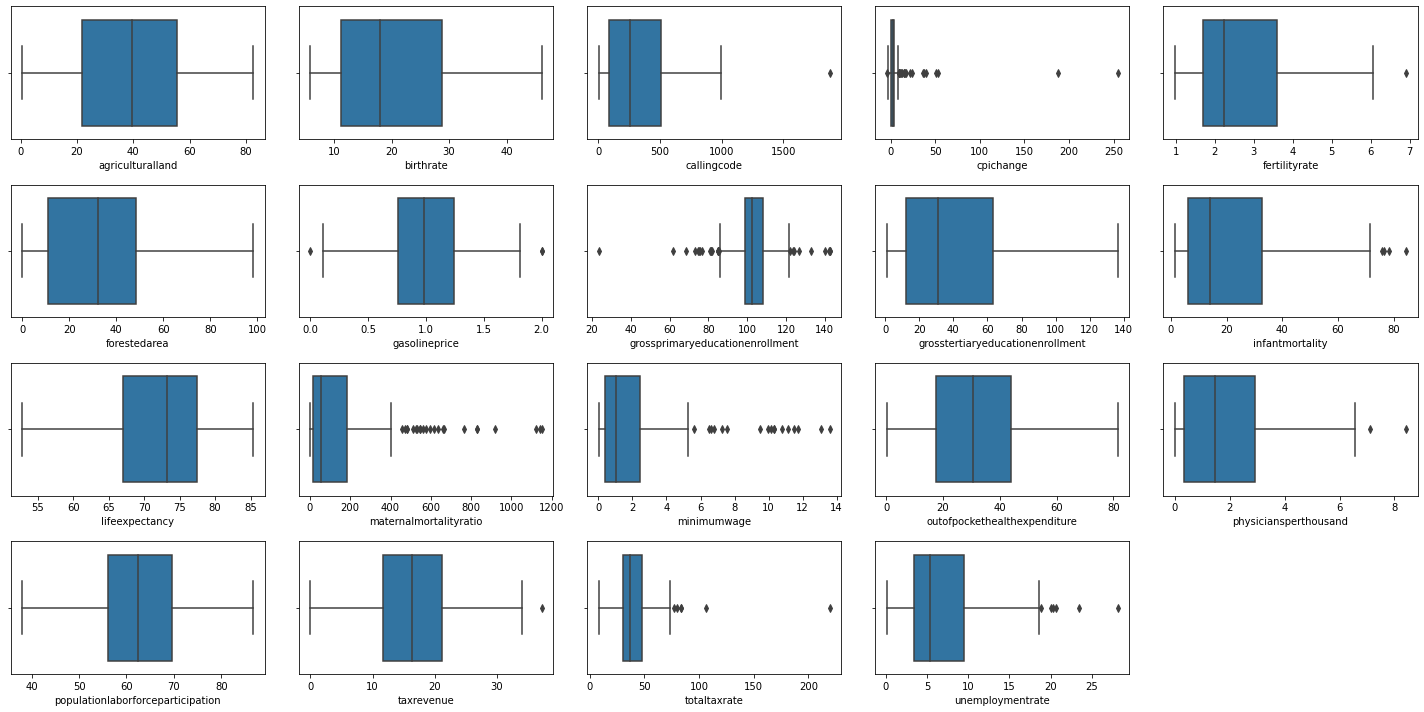

In [25]:

fig, axes = plt.subplots(nrows = 4, ncols = 5, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);